# Working with Graphs Using Numerical Techniques

https://kateto.net/netscix2016.html

### Installing packages

https://igraph.org/r/

`conda install -c r r-igraph`

For newer versions of MacOS, conda install is what works

In [6]:
library(igraph)

options(repr.plot.width = 5, repr.plot.height = 5)

In [7]:
df = data.frame("n1"=c('A','A','A','A', 'B', 'C', 'F', 'E', 'D', 'A', 'P', 'P', 'B'),
                "n2"=c('B','C','E','F', 'C', 'F', 'D', 'D', 'A', 'P', 'Q', 'R', 'R'),
                
                "weight"=c(2, 3, 2, 5, 3, 3, 1, 2, 3, 2, 4, 2, 2))

df

n1,n2,weight
A,B,2
A,C,3
A,E,2
A,F,5
B,C,3
C,F,3
F,D,1
E,D,2
D,A,3
A,P,2


### Create a graph from data frame

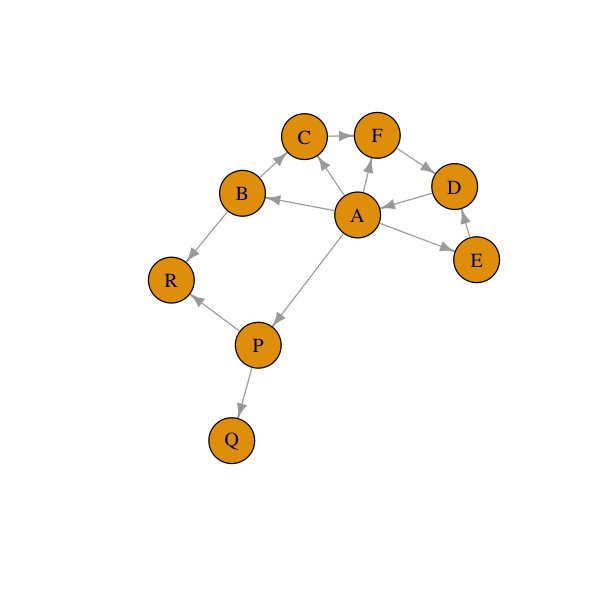

In [8]:
graph_df <- graph_from_data_frame(df, directed = T)

plot(graph_df, vertex.size = 30, vertex.label.cex = 1)

### Create a graph from a data frame

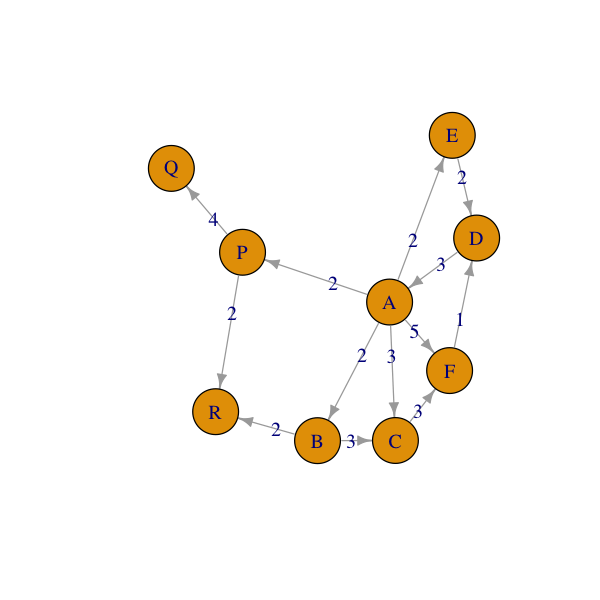

In [9]:
graph_df <- set_edge_attr(graph_df, "label", value = E(graph_df)$weight)

plot(graph_df, vertex.size = 30, vertex.label.cex = 1)

### Find shortest distance from source to destination

https://www.rdocumentation.org/packages/igraph/versions/0.1.1/topics/shortest.paths

https://igraph.org/r/doc/distances.html

__Note:-__ 
* Here, we want to find shortest distance between `A` to `F` and `A` to `D`. 
* `v` is as `source` and `to` is as `destination`
* Output is in data frame format.
* Here, algorithm are many type `algorithm = c("automatic", "unweighted", "dijkstra", "bellman-ford", "johnson")`
  you can use one of them but result are same.
* Algorithm help for time complexity but resuls are same.

#### 1. Using mode `out`
Note:- In `out mode` node goes from to another node.

In [10]:
distances(graph_df, v = c('A'), to = c('F', 'D'), mode = c('out'), algorithm = c('dijkstra'))

,F,D
A,5,4


In [14]:
distances(graph_df, v = c('P'), to = c('Q', 'B'), mode = c('out'), algorithm = c('bellman-ford'))

,Q,B
P,4,Inf


#### 2. Using mode `in`
Note:- In `in mode` node comes to it from another node

In [15]:
distances(graph_df, v = c('A'), to = c('F', 'D'), mode = c('in'), algorithm = c('dijkstra'))

,F,D
A,4,3


In [16]:
distances(graph_df, v = c('P'), to = c('Q', 'B'), mode = c('in'), algorithm = c('bellman-ford'))

,Q,B
P,Inf,12


#### 3. Using mode `all`
Note:- In `all mode` takes which is easy to take

In [17]:
distances(graph_df, v = c('A'), to = c('F', 'D'), mode = c('all'), algorithm = c('dijkstra'))

,F,D
A,4,3


### Find shortest path
* Case - I

In [19]:
path <- shortest_paths(graph_df, from = 'F', to = c('A'), mode = c('out') )

path$vpath

[[1]]
+ 4/9 vertices, named, from 155b052:
[1] F D A P


In [21]:
path <- shortest_paths(graph_df, from = 'F', to = c('A'), mode = c('in') )

path$vpath

[[1]]
+ 2/9 vertices, named, from 155b052:
[1] F A


In [22]:
path <- shortest_paths(graph_df, from = 'F', to = c('A'), mode = c('all') )
path$vpath

[[1]]
+ 3/9 vertices, named, from 155b052:
[1] F D A


Case -II

In [23]:
path <- shortest_paths(graph_df, from = 'F', to = c('A', 'E'), mode = c('out') )

path$vpath

[[1]]
+ 3/9 vertices, named, from 155b052:
[1] F D A

[[2]]
+ 4/9 vertices, named, from 155b052:
[1] F D A E


In [24]:
path <- shortest_paths(graph_df, from = 'F', to = c('A', 'E'), mode = c('in') )

path$vpath

[[1]]
+ 2/9 vertices, named, from 155b052:
[1] F A

[[2]]
+ 4/9 vertices, named, from 155b052:
[1] F A D E


In [25]:
path <- shortest_paths(graph_df, from = 'F', to = c('A', 'R'), mode = c('all') )

path$vpath

[[1]]
+ 3/9 vertices, named, from 155b052:
[1] F D A

[[2]]
+ 5/9 vertices, named, from 155b052:
[1] F D A P R
